# ETF 与期货组合策略

## 摘要



## 理论模型

### 无风险套利

当股指期货的市场价格偏离了其理论价格的某个价格区间（无套利区间）, 就可以在期货市场上和现货市场上通过卖高买低获得收益, 即期现套利. 期现套利的理论依据是, 在到期日, 股指期货的价格和标的指数会收敛. 

期现套利分为正向套利与反向套利两种:     
* **正向套利**: 当现货指数被低估, 而相应的期货被高估时, 就可以卖出期货合约, 买入现货, 待价差收敛时, 平仓期货合约, 卖出现货, 获得收益. 
* **反向套利**: 当现货指数被高估, 期货被低估时, 可以买入期货合约, 卖出现货, 在价差收敛时平仓获利.

在 ETF 未发行上市前, 指数现货及期货产生正向套利机会时, 投资者必须于市场上买入一篮子投资组合并放空期货, 来赚取套利空间; 当指数与指数期货产生反向套利机会时, 必须买入期货并放空一篮子证券. ETF 的发行为投资者提供了买卖现货组合的工具. 投资者以 ETF 取代一篮子投资组合的交易, 有利于进行期限套利.

指数现货与指数期货的价格关系式, 首先采用持有成本方法计算理论指数期货价格, 再以理论价格考虑交易成本确定套利区间, 并考虑现金股利的发放. 股票股利并不影响期货价格, 故无须考虑. 投资者可将现金股利再投资, 亦可握在手中不作任何投资, 故考虑现金股利的关系式于上限时, 不考虑现金股利的再投资价值.
$$
S_t e^{r(T-t)}-D_T-C_1 \le F_t \le S_t e^{r(T-t)}-D+C_2 \\
D_T = \sum\limits_{j=1}^{N} d_{j,\tau}\cdot e^{r\tau}\cdot \varphi_j \\
D = \sum\limits_{j=1}^{N} d_{j,\tau}\cdot \varphi_j \\
$$
其中:
$\varphi_j$: 为股票 j 占指数的权重
$D_T$: 为已考虑时间价值之累积现金股利
$F_t$: 指数期货在 t 时刻之价格
$d_{j,\tau}$: 为股票 j 发放之现金股利金额


考虑到存在交易费用、保证金占用以及融资融券成本, 假设相关参数如下:
1. 当前时刻为$t$, 期货到期日为 $T$ ;
2. 现货在 $t,T$ 时刻的价格为 $S_t, S_T$, 期货在 $t,T$ 时刻的价格为 $F_t,F_T$, 到期日价格收敛 $S_T=F_T$
3. 期货的保证金率为 $M_F$, 融券保证金率为 $M_S$;
4. 现货和期货的交易费率分别为 $C_S,C_F$;
5. 无风险年利率 $r_f$, 融券年利率 $r_S$, $t$ 时刻到 $T$ 时刻的分红率为 $D_{tT}$

**正向套利现金流**

| 产品 | $t$ 时刻 | $T$ 时刻 |
| ---- | -------- | -------- |
| 期货 | 卖出期货保证金: $-F_tM_F$, 交易成本: $-F_tC_F$ | 平仓期货: $F_t-F_T+F_tM_F$, 交易成本: $-F_TC_F$ |
| 现货 | 买入现货: $-S_t$, 交易成本: $-S_tC_S$ | 卖出现货: $S_T$, 交易成本: $-S_TC_S$, 分红收入: $S_TD_{tT}$ |
| 组合 | $-F_tM_F-F_tC_F-S_t-S_tC_S$ | $F_t+F_tM_F-F_TC_F-S_TC_S+S_TD_{tT}$ |

根据上表中的现金流, 可以计算出到期日平仓时的收益率为:
$$
\frac{F_t+F_tM_F-F_TC_F-S_TC_S+S_TD_{tT}}{F_tM_F+F_tC_F+S_t+S_tC_S}-1
$$

如果该收益率超过给定的预期收益率 $r_e$, 则认为存在正向套利机会.

**反向套利现金流**

| 产品 | $t$ 时刻 | $T$ 时刻 |
| ---- | -------- | -------- |
| 期货 | 买入期货保证金: $-F_tM_F$, 交易成本: $-F_tC_F$ | 平仓期货: $F_T-F_t+F_tM_F$, 交易成本: $-F_TC_F$ |
| 现货 | 现货融券保证金: $-S_tM_S$, 交易成本: $-S_tC_S$ | 买入现货: $S_t-S_T+S_tM_S$, 交易成本: $-S_TC_S$, 分红支出: $-S_TD_{tT}$, 融券利息: $S_t\left[\right(1+r_S)^{(T-t)/360}-1]$ |
| 组合 | $-F_tM_F-F_tC_F-S_tM_S-S_tC_S$ | $-F_t+F_tM_F-S_TC_S+S_t+S_tM_S-S_TC_S-S_TD_{tT}-S_t\left[(1+r_S)^{(T-t)/360}-1\right]$ |

根据上表中的现金流, 可以计算出到期日平仓时的收益率为:
$$
\frac{-F_t+F_tM_F-S_TC_S+S_t+S_tM_S-S_TC_S-S_TD_{tT}-S_t\left[(1+r_S)^{(T-t)/360}-1\right]}{F_tM_F+F_tC_F+S_tM_S+S_tC_S}-1
$$

如果该收益率超过给定的预期收益率 $r_e$, 则认为存在反向套利机会.

### 动量策略

**期货的收益分解**

假设股指期货的定价满足下面的公式:
$$
F(t, T) = S(t)e^{\gamma(t-T)}
$$
进一步, 假设标的满足:
$$
S(t) = S_0e^{\alpha t}
$$
则,
$$
F(t, T) = S_0e^{\alpha t+\gamma(t-T)}
$$
从而,
$$
\frac{\partial\ln F(t, T)}{\partial t} = \alpha + \gamma\\
-\frac{\partial\ln F(t, T)}{\partial T} = \gamma\\
$$
其中, $\alpha$ 是即期收益(Spot Return), $\gamma$ 是展期收益(Roll Return), 期货合约的总收益可以分解成即期收益+展期收益.

如果展期收益的符号具有一定的持续性, 就可以通过构造标的和期货的对冲组合提取出展期收益, 具体的讲, 在展期收益率为正(期货贴水)时, 可以做多期货做空标的; 当展期收益率为负(期货升水)时, 可以做空期货做多标的. 指数的标的可以以 ETF 代替.

## 实证分析

下面主要以上证 50 指数, 上证 50 ETF 和 IH 期货为例进行相关的实证分析.

In [1]:
# coding=utf-8
import time
import sys
import os
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
sys.path.append("C:\\Users\\hushuntai\\svn\\python")

import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib.pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
#%matplotlib notebook
import matplotlib.dates as mdate
from tqdm import tqdm_notebook

import QuantStudio.api as QS
WDB = QS.FactorDB.WindDB2();

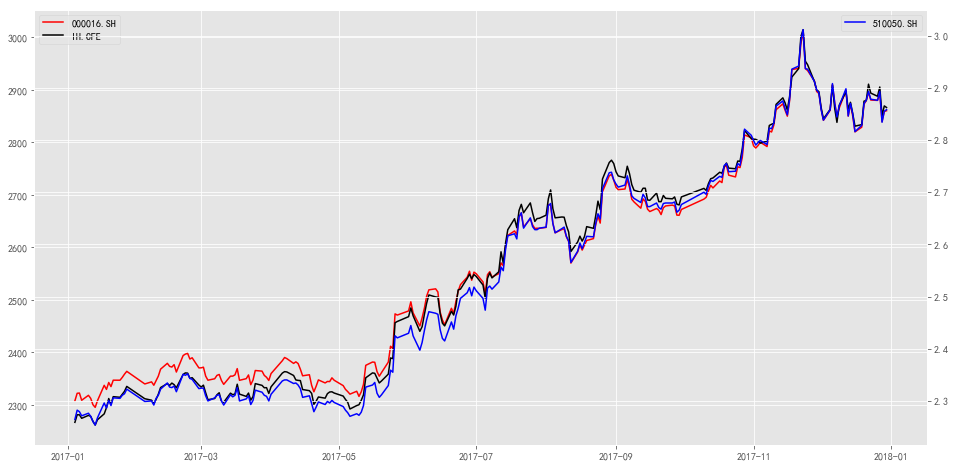

In [2]:
# --------参数设置---------
StartDT = dt.datetime(2017,1,1)
EndDT = dt.datetime(2017,12,31,23,59,59,999999)
SpotID = "000016.SH"
ETFID = "510050.SH"
FutureID = "IH.CFE"

# --------准备数据--------
WDB.connect()
FT = WDB.getTable("中国封闭式基金日行情")
DTs = FT.getDateTime(start_dt=StartDT, end_dt=EndDT)
Price = WDB.getTable("中国A股指数日行情").readData(factor_names=["收盘价"], ids=[SpotID], dts=DTs).iloc[0, :, :]
Price[ETFID] = WDB.getTable("中国封闭式基金日行情").readData(factor_names=["收盘价(元)"], ids=[ETFID], dts=DTs).iloc[0,:,0]
Price[FutureID] = WDB.getTable("中国股指期货日行情").readData(factor_names=["结算价(元)"], ids=[FutureID], dts=DTs).iloc[0,:,0]

# 对 ETF 价格进行复权调整
AdjustFactor = WDB.getTable("中国封闭式基金日行情").readData(factor_names=["复权因子"], ids=[ETFID], dts=DTs).iloc[0,:,0]
Price.iloc[:, 1] = Price.iloc[:, 1]/AdjustFactor.iloc[-1]*AdjustFactor# 前复权

# 对期货数据进行展期调整
FutureIDMap = WDB.getTable("中国期货连续(主力)合约和月合约映射表").readData(factor_names=["映射月合约Wind代码"], ids=[FutureID], dts=DTs).iloc[0,:,0]
FuturePrice = WDB.getTable("中国股指期货日行情").readData(factor_names=["结算价(元)"], ids=FutureIDMap.unique(), dts=DTs).iloc[0]
iNextID = FutureIDMap.iloc[-1]
for i, iDT in enumerate(reversed(Price.index[1:])):
    i = Price.shape[0]-i-1
    iID = FutureIDMap.loc[iDT]
    if iID!=iNextID:
        iAdjustFactor = FuturePrice[iNextID].iloc[i+1]/FuturePrice[iID].iloc[i+1]
        Price.iloc[:i+1, 2] *= iAdjustFactor
        iNextID = iID
WDB.disconnect()

# 绘制价格图像
Fig, Axes = plt.subplots(1, 1, figsize=(16, 8))
Axes.xaxis_date()
Axes.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
Axes.plot(Price.index, Price.values[:, 0], color='r', label=Price.columns[0])
RAxis = Axes.twinx()
RAxis.plot(Price.index, Price.values[:, 1], color='b', label=Price.columns[1])
Axes.plot(Price.index, Price.values[:, 2], color='k', label=Price.columns[2])
Axes.legend(loc='upper left')
RAxis.legend(loc='upper right');

### 期货的收益分解

使用线性回归估计即期收益和展期收益. 数据为上证 50 指数以及 IH 期货的日数据, 来自于 wind 数据库. 

首先设置参数并提取相关数据:


In [3]:
# --------参数设置---------
FutureContinuousContractIDs = ["IH00.CFE", "IH01.CFE", "IH02.CFE", "IH03.CFE"]

# --------准备数据--------
WDB.connect()
FutureIDMap = WDB.getTable("中国期货连续(主力)合约和月合约映射表").readData(factor_names=["映射月合约Wind代码"], ids=FutureContinuousContractIDs, dts=list(Price.index)).iloc[0,:,:]
FutureIDs = sorted(np.unique(FutureIDMap.values.flatten()).tolist())
FuturePrice = WDB.getTable("中国股指期货日行情").readData(factor_names=["结算价(元)"], ids=FutureIDs, dts=DTs).iloc[0]
FutureInfo = WDB.getTable("中国期货基本资料").readData(factor_names=["上市日期", "最后交易日期"], ids=FutureIDs, dts=[dt.datetime.today()]).iloc[:, 0, :]
WDB.disconnect();

接着, 以标的对数价格序列对于时间的回归系数作为即期收益的估计, 结果如下所示:

Average annualized spot return: 26.02%


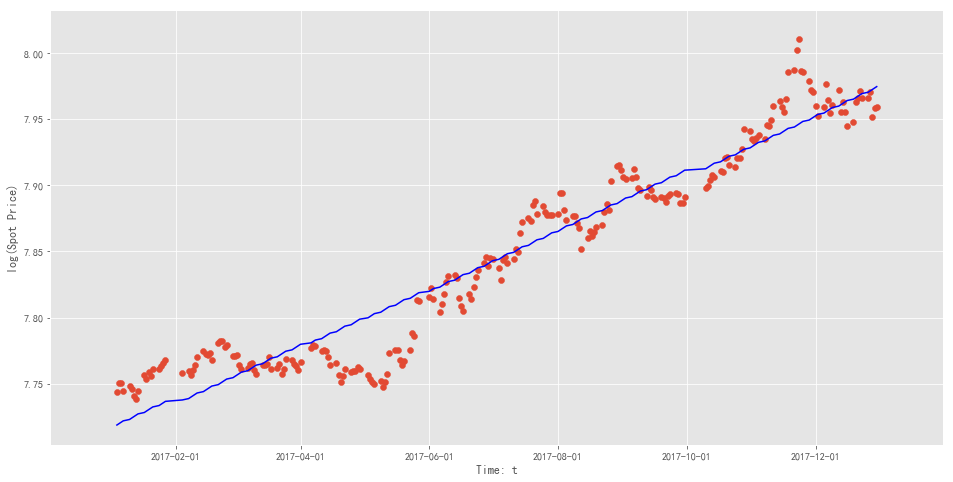

In [4]:
# --------估计 Spot Return--------
X = np.arange(Price.shape[0])
RegRslt = sm.OLS(np.log(Price.iloc[:, 0].values), sm.add_constant(X, prepend=False), missing="drop").fit()
SpotReturn = RegRslt.params[0]*Price.shape[0]/(Price.index[-1]-Price.index[0]).days*365
print("Average annualized spot return: %.2f%%" % (SpotReturn*100, ))
Fig, Axes = plt.subplots(figsize=(16, 8))
Axes.xaxis_date()
Axes.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
Axes.set_xlabel("Time: t")
Axes.set_ylabel("log(Spot Price)")
Axes.scatter(Price.index, np.log(Price.iloc[:, 0].values))
Axes.plot(Price.index, RegRslt.params[0]*X+RegRslt.params[1], color="b");

以每个时点上期货合约的对数价格相对于到期时间的回归系数作为展期收益的估计.


Average annualized roll return: 1.28%


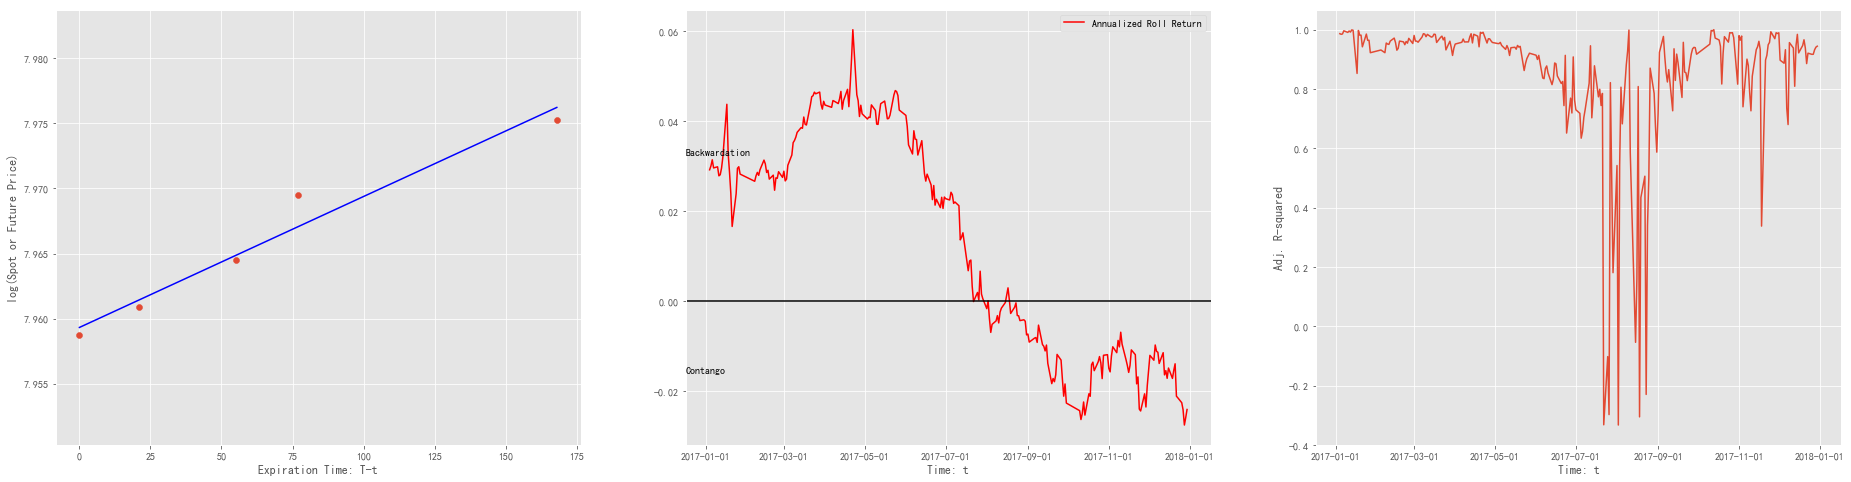

In [5]:
# --------估计 Roll Return--------
RollReturn = np.full(Price.shape[0], np.nan)
RollRegressStats = pd.DataFrame(np.nan, index=FuturePrice.index, columns=["R-squared", "Adj. R-squared", "F-statistic", "t-statistic"])
for i, iDT in enumerate(tqdm_notebook(FuturePrice.index, desc="日期 loop")):
    iFutureIDs = FutureIDMap.iloc[i].values.tolist()
    iX = [dt.datetime.strptime(iDateStr, "%Y%m%d").date() for iDateStr in FutureInfo["最后交易日期"].loc[iFutureIDs].values]
    iX = np.array([(iDate-iDT.date()).days for iDate in iX])
    iX = np.r_[0, iX]
    iY = np.log(FuturePrice.iloc[i].loc[iFutureIDs].values)
    iY = np.r_[np.log(Price.iloc[i, 0]), iY]
    iRegRslt = sm.OLS(iY, sm.add_constant(iX, prepend=False), missing="drop").fit()
    RollReturn[i] = -iRegRslt.params[0] * 240
    RollRegressStats.iloc[i] = (iRegRslt.rsquared, iRegRslt.rsquared_adj, iRegRslt.fvalue, iRegRslt.tvalues[0])
RollReturn = pd.Series(RollReturn, index=FuturePrice.index, name="Annualized Roll Return")
print("Average annualized roll return: %.2f%%" % (RollReturn.mean()*100, ))
Fig, Axes = plt.subplots(1, 3, figsize=(32, 8))
Axes[0].set_ylabel("log(Spot or Future Price)")
Axes[0].set_xlabel("Expiration Time: T-t")
Axes[0].scatter(iX, iY)
Axes[0].plot(iX, iRegRslt.params[0]*iX+iRegRslt.params[1], color="b")
Axes[1].xaxis_date()
Axes[1].xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
Axes[1].set_xlabel("Time: t")
Axes[1].plot(RollReturn.index, RollReturn.values, color='r', label=RollReturn.name)
Axes[1].axhline(0, color="k")
Axes[1].text(Axes[1].get_xlim()[0], Axes[1].get_ylim()[1]/2, "Backwardation")
Axes[1].text(Axes[1].get_xlim()[0], Axes[1].get_ylim()[0]/2, "Contango")
Axes[1].legend(loc='best')
Axes[2].set_ylabel("Adj. R-squared")
Axes[2].xaxis_date()
Axes[2].xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
Axes[2].set_xlabel("Time: t")
Axes[2].plot(RollRegressStats.index, RollRegressStats.values[:, 1]);

下面对展期收益率进行简单的时间序列分析, 首先检验展期收益率的平稳性

In [6]:
# --------平稳性检验--------
# ADF 检验
RollReturnADFTest = sm.tsa.stattools.adfuller(RollReturn.values, regression='c', autolag="BIC")
print(("Roll Return ADF Test Statistic : %f" % RollReturnADFTest[0]), 
      ("pvalue : %f" % RollReturnADFTest[1]), 
      ("usedlag : %d" % RollReturnADFTest[2]), sep="\n")

# Hurst 指数
from QuantStudio.Tools.MathFun import genHurstExp
RollReturnHurstExp, _ = genHurstExp(RollReturn.values)
print("Roll Return Hurst Exponent : %f" % RollReturnHurstExp)

# # Variance Ratio 检验
# import matlab
# import matlab.engine
# MatlabEngine = matlab.engine.start_matlab(option="-nodesktop")
# RollReturnVRTest = MatlabEngine.vratiotest(matlab.double(RollReturn.values.tolist()), "IID", True, nargout=3)
# MatlabEngine.quit()
# print(("Roll Return Variance Ratio Test Statistic : %f" % RollReturnVRTest[2]), 
#       ("pvalue : %f" % RollReturnVRTest[1]), sep="\n")

Roll Return ADF Test Statistic : -0.487609
pvalue : 0.894412
usedlag : 0
Roll Return Hurst Exponent : 0.389772


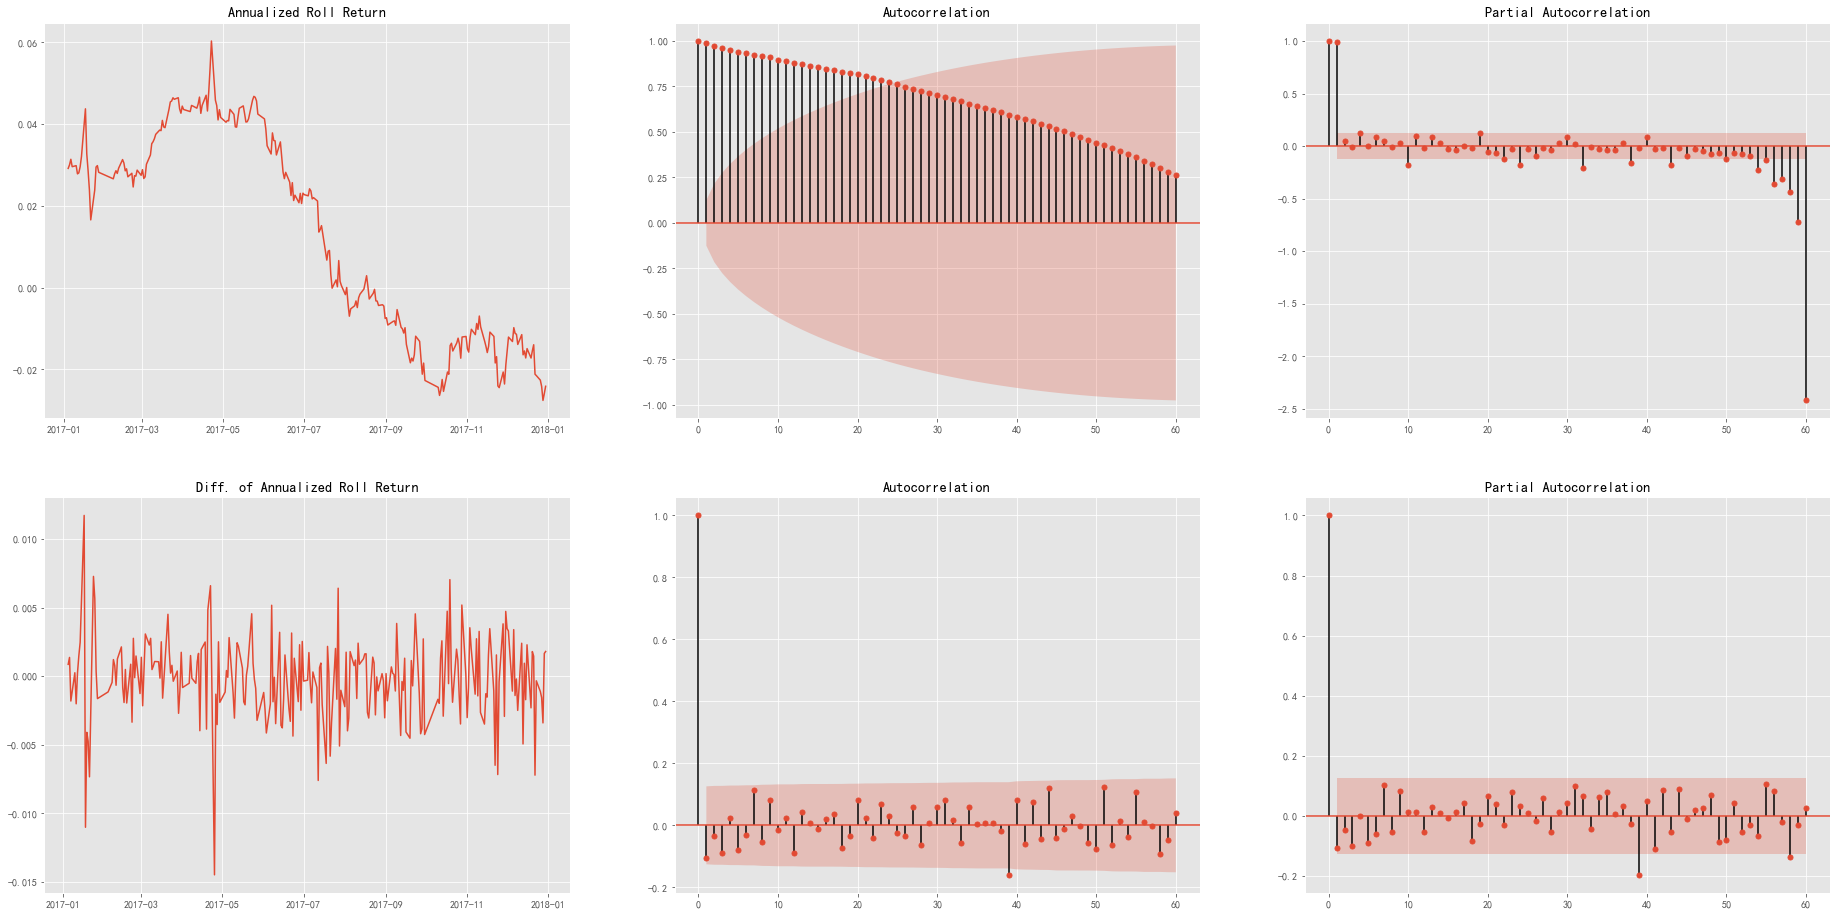

In [7]:
# ACF, PACF
DiffRollReturn = RollReturn.diff().iloc[1:]
Fig, Axes = plt.subplots(2, 3, figsize=(32, 16))
Axes[0, 0].plot(RollReturn)
Axes[0, 0].set_title(RollReturn.name)
sm.graphics.tsa.plot_acf(RollReturn, lags=60, ax=Axes[0, 1])
sm.graphics.tsa.plot_pacf(RollReturn, lags=60, ax=Axes[0, 2])
Axes[1, 0].plot(DiffRollReturn)
Axes[1, 0].set_title("Diff. of "+RollReturn.name)
sm.graphics.tsa.plot_acf(DiffRollReturn, lags=60, ax=Axes[1, 1])
sm.graphics.tsa.plot_pacf(DiffRollReturn, lags=60, ax=Axes[1, 2]);

由自相关函数的图像来看, 展期收益率本身并不平稳, 但其差分序列表现平稳, 下面对其差分序列进行平稳性和自相关性检验:

In [8]:
# --------平稳性检验--------
# ADF 检验
DiffRollReturnADFTest = sm.tsa.stattools.adfuller(DiffRollReturn.values, regression='c', autolag="BIC")
print(("Diff. of Roll Return ADF Test Statistic : %f" % DiffRollReturnADFTest[0]), 
      ("pvalue : %f" % DiffRollReturnADFTest[1]), 
      ("usedlag : %d" % DiffRollReturnADFTest[2]), sep="\n")

# Hurst 指数
from QuantStudio.Tools.MathFun import genHurstExp
DiffRollReturnHurstExp, _ = genHurstExp(DiffRollReturn.values)
print("Diff. of Roll Return Hurst Exponent : %f" % DiffRollReturnHurstExp)

# # Variance Ratio 检验
# import matlab
# import matlab.engine
# MatlabEngine = matlab.engine.start_matlab(option="-nodesktop")
# DiffRollReturnVRTest = MatlabEngine.vratiotest(matlab.double(DiffRollReturn.values.tolist()), "IID", True, nargout=3)
# MatlabEngine.quit()
# print(("Diff. of Roll Return Variance Ratio Test Statistic : %f" % DiffRollReturnVRTest[2]), 
#       ("pvalue : %f" % DiffRollReturnVRTest[1]), sep="\n")

# --------自相关性检验--------
# Durbin-Watson 检验
DiffRollReturnDWTest = sm.stats.stattools.durbin_watson(DiffRollReturn.values)
print("Diff. of Roll Return Durbin-Watson Test Statistic : %f" % DiffRollReturnDWTest)
# Ljung-Box Q 检验
DiffRollReturnQTest = sm.stats.diagnostic.acorr_ljungbox(DiffRollReturn.values, lags=None)
DiffRollReturnQTest = pd.DataFrame(np.array(DiffRollReturnQTest).T, columns=["Ljung-Box Q Statistic", "Ljung-Box pvalue"],
                                   index=pd.Index(np.arange(1, DiffRollReturnQTest[0].shape[0]+1),name="lag"))
print("Diff. of Roll Return Ljung-Box Q Test", DiffRollReturnQTest, sep="\n")

Diff. of Roll Return ADF Test Statistic : -0.487609
pvalue : 0.894412
usedlag : 0
Diff. of Roll Return Hurst Exponent : 0.031588
Diff. of Roll Return Durbin-Watson Test Statistic : 2.199985
Diff. of Roll Return Ljung-Box Q Test
     Ljung-Box Q Statistic  Ljung-Box pvalue
lag                                         
1                 2.813121          0.093496
2                 3.124875          0.209624
3                 5.113810          0.163651
4                 5.239688          0.263576
5                 6.867315          0.230697
6                 7.104177          0.311320
7                10.460532          0.163943
8                11.223153          0.189373
9                12.938724          0.165399
10               13.005108          0.223386
11               13.133599          0.284683
12               15.116977          0.235102
13               15.571387          0.273051
14               15.592199          0.338907
15               15.636037          0.406644
16     

从上述检验来看, 展期收益率的差分序列表现平稳, 且没有显著的自相关性, 可以推断其为白噪声过程, 从而展期收益率序列本身是一个随机游走过程.

### ETF 和期货的时间序列分析

对 ETF 和股指期货对数价格序列进行协整检验, 其 ADF 单位根检验结果如下:

In [9]:
# CointADFTest = sm.tsa.stattools.coint(Price.values[:, 0], Price.values[:, 1:], trend="c", autolag="BIC")
CointADFTest = sm.tsa.stattools.coint(np.log(Price.values[:, 1]), np.log(Price.values[:, 2:]), trend="c", autolag="BIC")
print(("log(ETF)-log(Future) Cointegration ADF Test Statistic: %f" % CointADFTest[0]), 
      ("pvalue : %f" % CointADFTest[1]), sep="\n")

log(ETF)-log(Future) Cointegration ADF Test Statistic: -2.350036
pvalue : 0.348869


其 Johansen 检验结果如下:

In [10]:
# CointJohansenTest = sm.tsa.var.vecm.coint_johansen(Price.values, det_order=0, k_ar_diff=1)
CointJohansenTest = sm.tsa.var.vecm.coint_johansen(np.log(Price.iloc[:, 1:].values), det_order=0, k_ar_diff=1)
for i in range(CointJohansenTest.lr1.shape[0]):
    print(("log(ETF)-log(Future) Cointegration Johansen Test Trace Statistic(r<=%d): %f" % (i, CointJohansenTest.lr1[i])), 
          ("Critical Values (90%%, 95%%, 99%%) for Trace Statistic(r<=%d): %s" % (i, str(CointJohansenTest.cvt[i]))), 
          ("Maximum Eigenvalue Statistic Statistic(r<=%d): %f" % (i, CointJohansenTest.lr2[i])), 
          ("Critical Values (90%%, 95%%, 99%%) for Maximum Eigenvalue Statistic(r<=%d): %s" % (i, str(CointJohansenTest.cvm[i]))), sep="\n")

log(ETF)-log(Future) Cointegration Johansen Test Trace Statistic(r<=0): 11.961852
Critical Values (90%, 95%, 99%) for Trace Statistic(r<=0): [13.4294 15.4943 19.9349]
Maximum Eigenvalue Statistic Statistic(r<=0): 11.553462
Critical Values (90%, 95%, 99%) for Maximum Eigenvalue Statistic(r<=0): [12.2971 14.2639 18.52  ]
log(ETF)-log(Future) Cointegration Johansen Test Trace Statistic(r<=1): 0.408390
Critical Values (90%, 95%, 99%) for Trace Statistic(r<=1): [2.7055 3.8415 6.6349]
Maximum Eigenvalue Statistic Statistic(r<=1): 0.408390
Critical Values (90%, 95%, 99%) for Maximum Eigenvalue Statistic(r<=1): [2.7055 3.8415 6.6349]


从协整检验的结果来看, 两者之间没有显著的协整关系, 可以推测这主要是因为展期收益率的存在. 下面我们把展期收益率序列和对数价格序列放在一起进行 Johansen 检验, 结果如下:

In [11]:
CointJohansenTest_WRR = sm.tsa.var.vecm.coint_johansen(np.c_[np.log(Price.iloc[:, 1:].values), RollReturn.values], det_order=0, k_ar_diff=1)
for i in range(CointJohansenTest_WRR.lr1.shape[0]):
    print(("log(ETF)-log(Future)-Roll Return Cointegration Johansen Test Trace Statistic(r<=%d): %f" % (i, CointJohansenTest_WRR.lr1[i])), 
          ("Critical Values (90%%, 95%%, 99%%) for Trace Statistic(r<=%d): %s" % (i, str(CointJohansenTest_WRR.cvt[i]))), 
          ("Maximum Eigenvalue Statistic Statistic(r<=%d): %f" % (i, CointJohansenTest_WRR.lr2[i])), 
          ("Critical Values (90%%, 95%%, 99%%) for Maximum Eigenvalue Statistic(r<=%d): %s" % (i, str(CointJohansenTest_WRR.cvm[i]))), sep="\n")

log(ETF)-log(Future)-Roll Return Cointegration Johansen Test Trace Statistic(r<=0): 41.918406
Critical Values (90%, 95%, 99%) for Trace Statistic(r<=0): [27.0669 29.7961 35.4628]
Maximum Eigenvalue Statistic Statistic(r<=0): 29.027566
Critical Values (90%, 95%, 99%) for Maximum Eigenvalue Statistic(r<=0): [18.8928 21.1314 25.865 ]
log(ETF)-log(Future)-Roll Return Cointegration Johansen Test Trace Statistic(r<=1): 12.890840
Critical Values (90%, 95%, 99%) for Trace Statistic(r<=1): [13.4294 15.4943 19.9349]
Maximum Eigenvalue Statistic Statistic(r<=1): 12.532165
Critical Values (90%, 95%, 99%) for Maximum Eigenvalue Statistic(r<=1): [12.2971 14.2639 18.52  ]
log(ETF)-log(Future)-Roll Return Cointegration Johansen Test Trace Statistic(r<=2): 0.358675
Critical Values (90%, 95%, 99%) for Trace Statistic(r<=2): [2.7055 3.8415 6.6349]
Maximum Eigenvalue Statistic Statistic(r<=2): 0.358675
Critical Values (90%, 95%, 99%) for Maximum Eigenvalue Statistic(r<=2): [2.7055 3.8415 6.6349]


从检验结果来看, 在 95% 的置信水平下, 我们可以判定三者之间存在协整关系, 从而说明展期收益率的存在破坏了 ETF 和期货之间的协整关系.

### ETF 和期货的组合动量策略

下面我们以 50 ETF(510050.SH) 以及 IH 股指期货构造组合动量策略: 在展期收益率为正(期货贴水)时, 做多期货做空 ETF; 当展期收益率为负(期货升水)时, 做空期货做多 ETF.

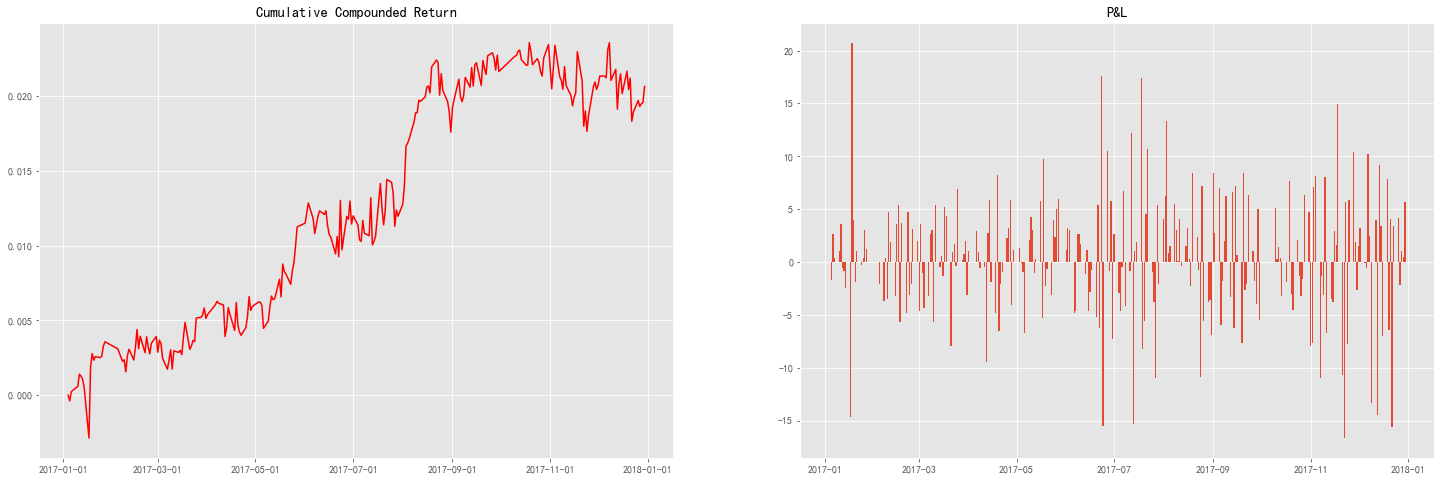

APR: 2.09%, Sharpe Ratio: 1.14


In [12]:
# --------构建组合动量策略--------
# 估计 ETF 和指数的对冲比例
HedgeRatio = sm.OLS(Price.iloc[:, 0].values, sm.add_constant(Price.iloc[:, 1].values, prepend=False)).fit().params[0]
NumUnits = np.zeros(Price.shape[0])
NumUnits[RollReturn.values>0] = -1
NumUnits[RollReturn.values<0] = 1

Positions = pd.DataFrame(np.c_[NumUnits*HedgeRatio, -NumUnits]*Price.iloc[:, 1:].values, index=Price.index, columns=Price.columns[1:])
PNL = (Positions.shift(1) * (Price.iloc[:, 1:] - Price.iloc[:, 1:].shift(1)) / Price.iloc[:, 1:].shift(1)).sum(axis=1)
Return = PNL / Positions.shift(1).abs().sum(axis=1)
Return[~np.isfinite(Return)] = 0.0
CumReturn = (1+Return).cumprod() - 1

# 展示策略表现
Fig, Axes = plt.subplots(1, 2, figsize=(25, 8))
Axes[0].xaxis_date()
Axes[0].xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
Axes[0].plot(CumReturn.index, CumReturn.values, color='r')
Axes[0].set_title("Cumulative Compounded Return")
Axes[1].bar(PNL.index, PNL.values)
Axes[1].set_title("P&L")
plt.show()

DTs = Return[pd.notnull(Return)].index
nYear = (DTs[-1] - DTs[0]).days/365
print("APR: %.2f%%, Sharpe Ratio: %.2f" % (((1+Return).prod()**(1/nYear)-1) * 100, np.sqrt(len(DTs)/nYear)*Return.mean()/Return.std()))

### ETF 和期货的组合价差策略

虽然没有通过协整检验, 我们依然可以使用滚动窗口的方式构建价差的均值回复策略. 下面我们主要使用 Johansen 检验给出的特征向量作为对冲比率来构建 Spread 序列.

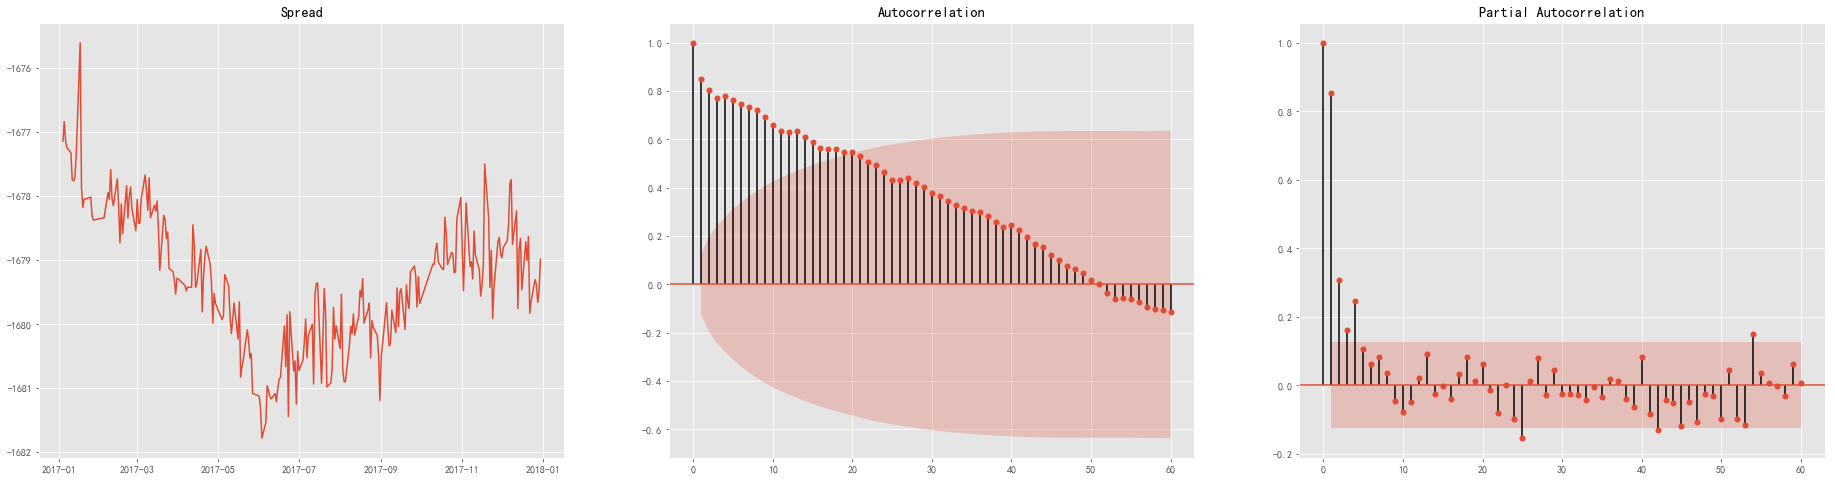

In [13]:
# Johansen Test 求 Spread
Spread = pd.Series(np.sum(CointJohansenTest.evec[:, 0]*np.log(Price.iloc[:, 1:].values), axis=1), index=Price.index)

# ACF, PACF
Fig, Axes = plt.subplots(1, 3, figsize=(32, 8))
Axes[0].plot(Spread)
Axes[0].set_title("Spread")
sm.graphics.tsa.plot_acf(Spread, lags=60, ax=Axes[-2])
sm.graphics.tsa.plot_pacf(Spread, lags=60, ax=Axes[-1]);

首先使用 OLS 方法估计 Spread 的半衰期大概为 5 天. 滚动计算 Spread 的 z-score 序列, 策略对 Spread 的投资金额正比于 Spread 的 z-score, 目前不考虑手续费等交易摩擦, 策略的简单表现如下:

HalfLife: 4.616251


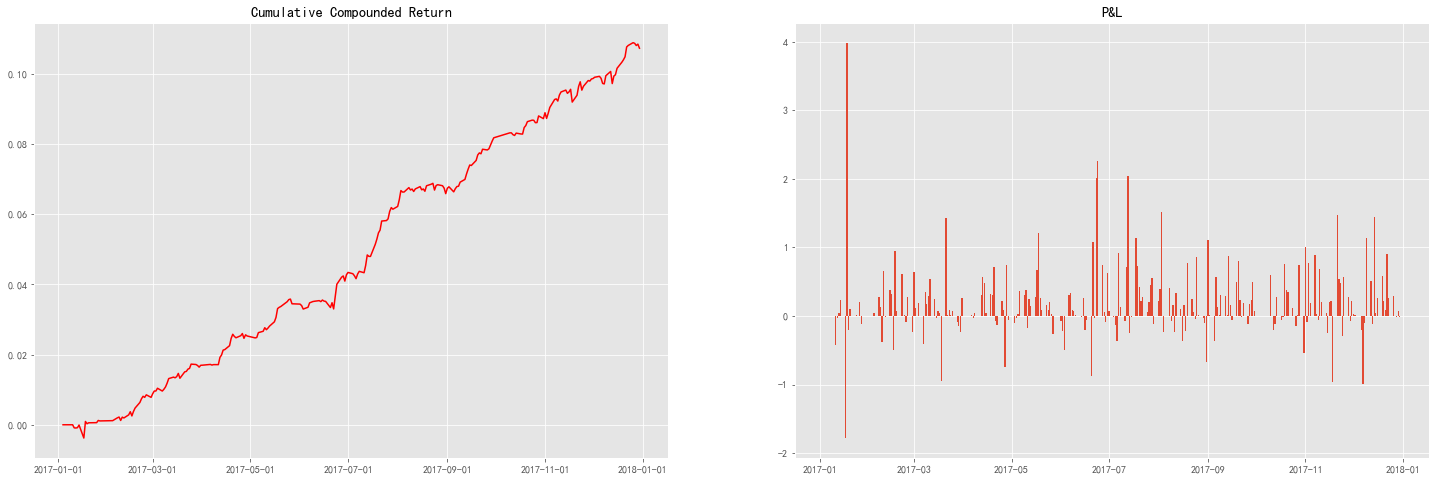

APR: 10.88%, Sharpe Ratio: 6.10


In [14]:
# 估计均值回复的半衰期
RegRslt = sm.OLS(np.diff(Spread.values), sm.add_constant(Spread.values[:-1], prepend=False)).fit()
HalfLife = -np.log(2)/RegRslt.params[0]
print("HalfLife: %f" % HalfLife)

# --------构建 Spread 策略--------
# 线性均值回复策略
LookBack = int(round(HalfLife))
Zscore = (Spread - Spread.rolling(LookBack).mean()) / Spread.rolling(LookBack).cov()**0.5
Positions = pd.DataFrame(np.repeat(-Zscore.values.reshape((Zscore.shape[0], 1)), Price.shape[1]-1, axis=1) * CointJohansenTest.evec[:, 0], index=Price.index, columns=Price.columns[1:])
# Positions = np.repeat(-Zscore.values.reshape((Zscore.shape[0], 1)), Price.shape[1], axis=1) * CointJohansenTest.evec[:, 0] * Price
PNL = (Positions.shift(1) * (Price.iloc[:, 1:] - Price.iloc[:, 1:].shift(1)) / Price.iloc[:, 1:].shift(1)).sum(axis=1)
Return = PNL / Positions.shift(1).abs().sum(axis=1)
Return[~np.isfinite(Return)] = 0.0
CumReturn = (1+Return).cumprod() - 1

# 展示策略表现
Fig, Axes = plt.subplots(1, 2, figsize=(25, 8))
Axes[0].xaxis_date()
Axes[0].xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
Axes[0].plot(CumReturn.index, CumReturn.values, color='r')
Axes[0].set_title("Cumulative Compounded Return")
Axes[1].bar(PNL.index, PNL.values)
Axes[1].set_title("P&L")
plt.show()

DTs = Return[pd.notnull(Return)].index
nYear = (DTs[-1] - DTs[0]).days/365
print("APR: %.2f%%, Sharpe Ratio: %.2f" % (((1+Return).prod()**(1/nYear)-1) * 100, np.sqrt(len(DTs)/nYear)*Return.mean()/Return.std()))

或者构建一个基于 Bollinger Band 的策略, 当 Spread 的 z-score 超过 1 时做空价差, 低于 0 时平仓, 低于 -1 时做多价差, 高于 0 时平仓, 目前不考虑手续费等交易摩擦, 策略的简单表现如下:

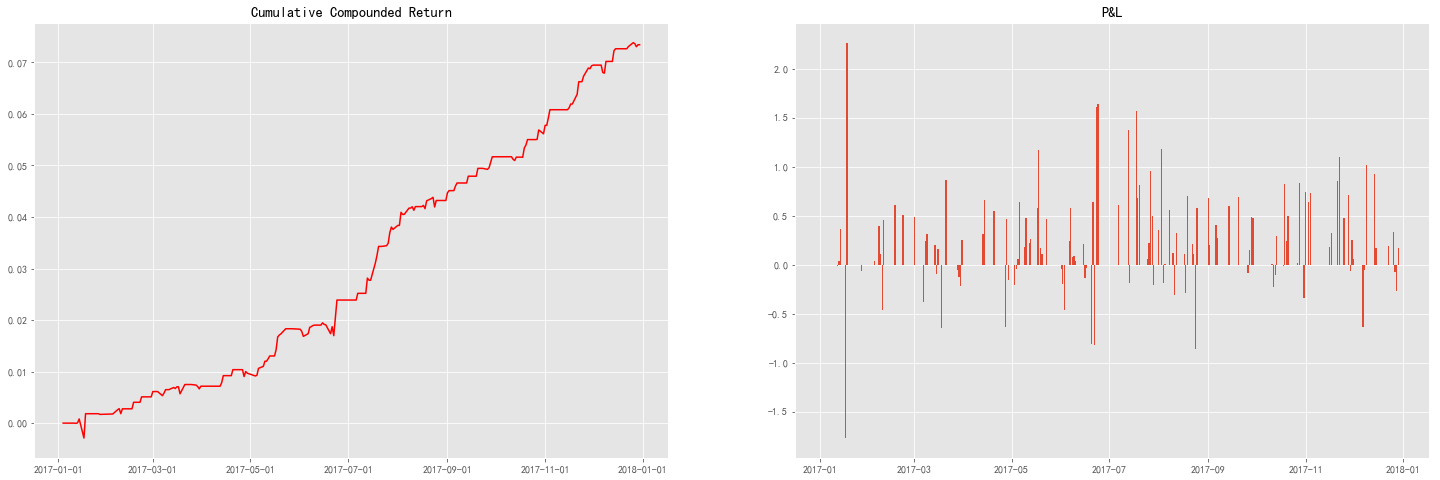

APR: 7.45%, Sharpe Ratio: 5.35


In [15]:
# Bollinger Band 均值回复策略
LookBack = int(round(HalfLife))
Zscore = (Spread - Spread.rolling(LookBack).mean()) / Spread.rolling(LookBack).cov()**0.5
EntryZscore, ExitZscore = 1, 0
NumUnitsLong = pd.Series(np.nan, index=Zscore.index)
NumUnitsLong.iloc[0] = 0
NumUnitsLong[Zscore < -EntryZscore] = 1
NumUnitsLong[Zscore > -ExitZscore] = 0
NumUnitsLong.fillna(method="pad", inplace=True)
NumUnitsShort = pd.Series(np.nan, index=Zscore.index)
NumUnitsShort.iloc[0] = 0
NumUnitsShort[Zscore > EntryZscore] = -1
NumUnitsShort[Zscore < ExitZscore] = 0
NumUnitsShort.fillna(method="pad", inplace=True)
NumUnits = NumUnitsLong + NumUnitsShort
Positions = pd.DataFrame(np.repeat(NumUnits.values.reshape((NumUnits.shape[0], 1)), Price.shape[1]-1, axis=1) * CointJohansenTest.evec[:, 0], index=Price.index, columns=Price.columns[1:])
# Positions = np.repeat(NumUnits.values.reshape((NumUnits.shape[0], 1)), Price.shape[1], axis=1) * CointJohansenTest.evec[:, 0] * Price
PNL = (Positions.shift(1) * (Price.iloc[:, 1:] - Price.iloc[:, 1:].shift(1)) / Price.iloc[:, 1:].shift(1)).sum(axis=1)
Return = PNL / Positions.shift(1).abs().sum(axis=1)
Return[~np.isfinite(Return)] = 0.0
CumReturn = (1+Return).cumprod() - 1

# 展示策略表现
Fig, Axes = plt.subplots(1, 2, figsize=(25, 8))
Axes[0].xaxis_date()
Axes[0].xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
Axes[0].plot(CumReturn.index, CumReturn.values, color='r')
Axes[0].set_title("Cumulative Compounded Return")
Axes[1].bar(PNL.index, PNL.values)
Axes[1].set_title("P&L")
plt.show()

DTs = Return[pd.notnull(Return)].index
nYear = (DTs[-1] - DTs[0]).days/365
print("APR: %.2f%%, Sharpe Ratio: %.2f" % (((1+Return).prod()**(1/nYear)-1) * 100, np.sqrt(len(DTs)/nYear)*Return.mean()/Return.std()))

下面我们从价差中剥离掉展期收益率后研究剩余项的时间序列特征, 主要使用 Johansen 检验给出的特征向量作为对冲比率来构建 Spread 序列.

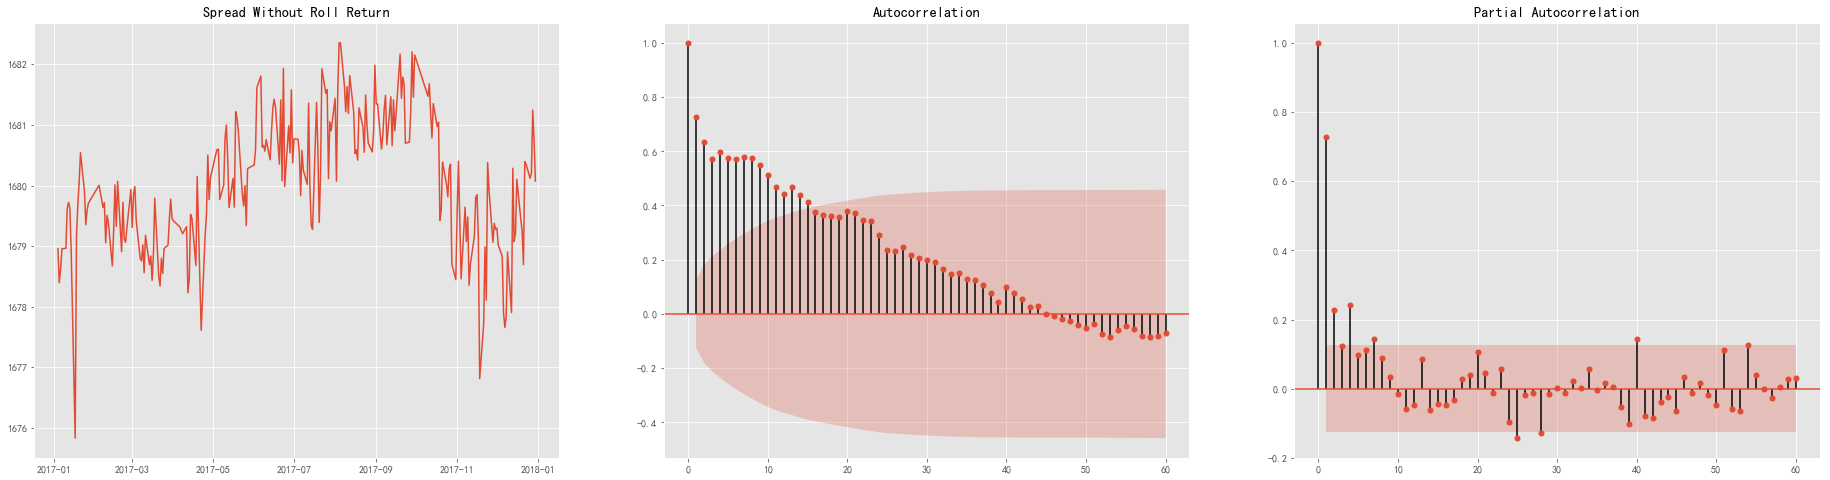

In [16]:
# Johansen Test 求 Spread
SpreadWoRR = pd.Series(np.sum(CointJohansenTest_WRR.evec[:, 0]*np.c_[np.log(Price.iloc[:, 1:].values), RollReturn.values], axis=1), index=Price.index)

# ACF, PACF
Fig, Axes = plt.subplots(1, 3, figsize=(32, 8))
Axes[0].plot(SpreadWoRR)
Axes[0].set_title("Spread Without Roll Return")
sm.graphics.tsa.plot_acf(SpreadWoRR, lags=60, ax=Axes[-2])
sm.graphics.tsa.plot_pacf(SpreadWoRR, lags=60, ax=Axes[-1]);

下面对剥离掉展期收益率的价差序列进行简单的时间序列分析

In [17]:
# --------平稳性检验--------
# ADF 检验
SpreadWoRRADFTest = sm.tsa.stattools.adfuller(SpreadWoRR.values, regression='c', autolag="BIC")
print(("ADF Test Statistic of Spread without Roll Return: %f" % SpreadWoRRADFTest[0]), 
      ("pvalue : %f" % SpreadWoRRADFTest[1]), 
      ("usedlag : %d" % SpreadWoRRADFTest[2]), sep="\n")

# Hurst 指数
from QuantStudio.Tools.MathFun import genHurstExp
SpreadWoRRHurstExp, _ = genHurstExp(SpreadWoRR.values)
print("Hurst Exponent of Spread without Roll Return : %f" % SpreadWoRRHurstExp)

# # Variance Ratio 检验
# import matlab
# import matlab.engine
# MatlabEngine = matlab.engine.start_matlab(option="-nodesktop")
# SpreadWoRRVRTest = MatlabEngine.vratiotest(matlab.double(SpreadWoRR.values.tolist()), "IID", True, nargout=3)
# MatlabEngine.quit()
# print(("Variance Ratio Test Statistic of Spread without Roll Return : %f" % SpreadWoRRVRTest[2]), 
#       ("pvalue : %f" % SpreadWoRRVRTest[1]), sep="\n")

# --------自相关性检验--------
# Durbin-Watson 检验
SpreadWoRRDWTest = sm.stats.stattools.durbin_watson(SpreadWoRR.values)
print("Durbin-Watson Test Statistic of Spread without Roll Return : %f" % SpreadWoRRDWTest)
# Ljung-Box Q 检验
SpreadWoRRQTest = sm.stats.diagnostic.acorr_ljungbox(SpreadWoRR.values, lags=None)
SpreadWoRRQTest = pd.DataFrame(np.array(SpreadWoRRQTest).T, columns=["Ljung-Box Q Statistic", "Ljung-Box pvalue"],
                               index=pd.Index(np.arange(1, SpreadWoRRQTest[0].shape[0]+1),name="lag"))
print("Ljung-Box Q Test of Spread without Roll Return", SpreadWoRRQTest, sep="\n")

ADF Test Statistic of Spread without Roll Return: -3.016367
pvalue : 0.033394
usedlag : 3
Hurst Exponent of Spread without Roll Return : 0.120429
Durbin-Watson Test Statistic of Spread without Roll Return : 0.000000
Ljung-Box Q Test of Spread without Roll Return
     Ljung-Box Q Statistic  Ljung-Box pvalue
lag                                         
1               129.988407      4.121778e-30
2               229.058984      1.821687e-50
3               310.605130      5.039517e-67
4               399.598815      3.396113e-85
5               482.960298     3.800883e-102
6               565.050979     8.033383e-119
7               649.483448     5.334284e-136
8               733.595312     4.173373e-153
9               810.999817     9.113939e-169
10              878.197958     3.131411e-182
11              934.989711     1.857353e-193
12              985.506908     2.445014e-203
13             1042.643740     1.208507e-214
14             1092.734990     1.940775e-224
15             11

下面对价差序列构建 ARMA 模型

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  244
Model:                     ARMA(2, 1)   Log Likelihood                -259.332
Method:                       css-mle   S.D. of innovations              0.699
Date:                Fri, 17 Aug 2018   AIC                            528.665
Time:                        14:41:21   BIC                            546.151
Sample:                             0   HQIC                           535.707
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1679.9186      0.445   3776.628      0.000    1679.047    1680.790
ar.L1.y        1.2279      0.089     13.739      0.000       1.053       1.403
ar.L2.y       -0.2466      0.084     -2.929      0.0

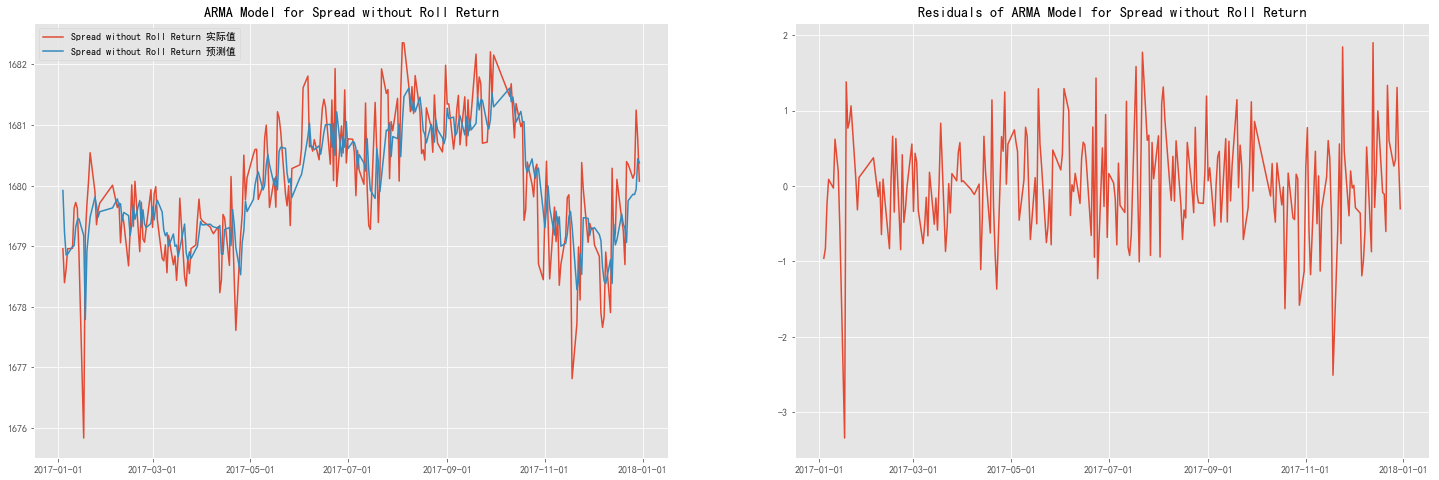

In [18]:
# 对 Spread 序列建立 ARMA 模型
# 确定 ARMA 模型的阶数
# ARMAOrder = sm.tsa.stattools.arma_order_select_ic(SpreadWoRR.values, max_ar=10, max_ma=3, ic="bic", trend='c')
# ARMAOrder = ARMAOrder.bic_min_order
# print(ARMAOrder)
# 构建 ARMA 模型
ARMAModel = sm.tsa.ARMA(SpreadWoRR.values, order=(2, 1))
ARMARslt = ARMAModel.fit(trend="c", disp=False)
print(ARMARslt.summary())

Fig, Axes = plt.subplots(1, 2, figsize=(25, 8))
Axes[0].xaxis_date()
Axes[0].xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
Axes[0].set_title("ARMA Model for Spread without Roll Return")
Axes[0].plot(SpreadWoRR.index, SpreadWoRR.values, label="Spread without Roll Return 实际值")
Axes[0].plot(SpreadWoRR.index, ARMARslt.fittedvalues, label="Spread without Roll Return 预测值")
Axes[0].legend()
Axes[1].xaxis_date()
Axes[1].xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
Axes[1].plot(SpreadWoRR.index, ARMARslt.resid)
Axes[1].set_title("Residuals of ARMA Model for Spread without Roll Return");

下面构建一个基于上述模型的策略, 当模型预测价差扩大时做多价差, 反之做空价差, 策略的简单表现如下:

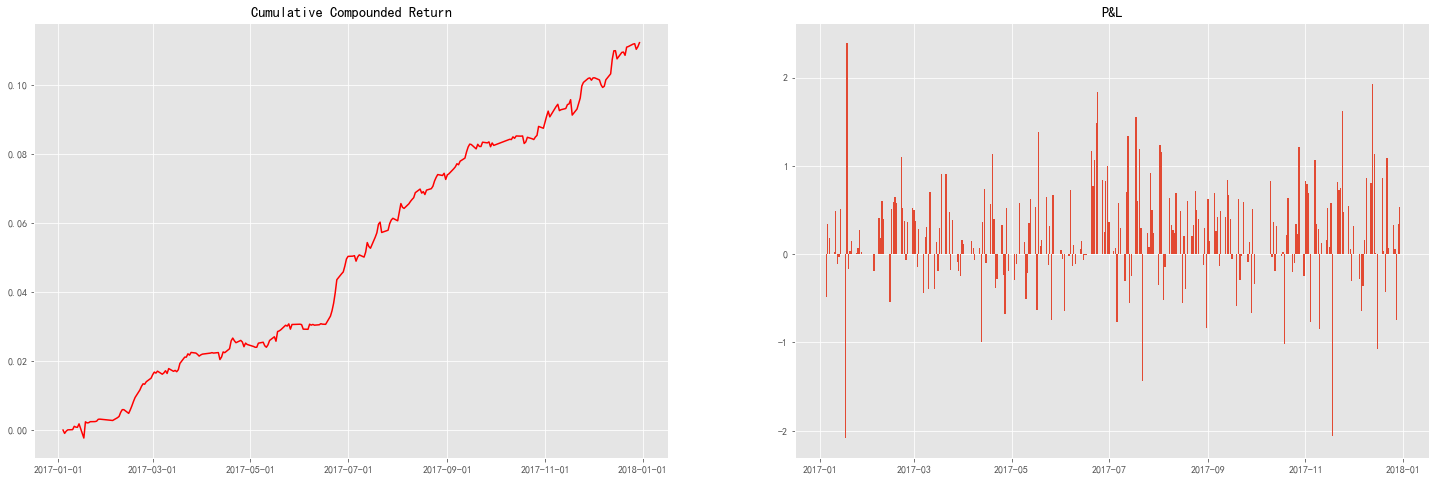

APR: 11.38%, Sharpe Ratio: 5.95


In [19]:
# 样本内策略
Spread = np.sum(CointJohansenTest_WRR.evec[:, 0][:2]*np.log(Price.iloc[:, 1:].values), axis=1)
Signal = np.r_[ARMARslt.fittedvalues[1:], ARMARslt.forecast(1)[0]] - (RollReturn.values * CointJohansenTest_WRR.evec[:, 0][2]) - Spread
NumUnitsLong = pd.Series(np.nan, index=SpreadWoRR.index)
NumUnitsLong.iloc[0] = 0
NumUnitsLong[Signal > 0] = 1
NumUnitsLong[Signal <= 0] = 0
NumUnitsLong.fillna(method="pad", inplace=True)
NumUnitsShort = pd.Series(np.nan, index=SpreadWoRR.index)
NumUnitsShort.iloc[0] = 0
NumUnitsShort[Signal < 0] = -1
NumUnitsShort[Signal >= 0] = 0
NumUnitsShort.fillna(method="pad", inplace=True)
NumUnits = NumUnitsLong + NumUnitsShort
Positions = pd.DataFrame(np.repeat(NumUnits.values.reshape((NumUnits.shape[0], 1)), Price.shape[1]-1, axis=1) * CointJohansenTest_WRR.evec[:, 0][:2], index=Price.index, columns=Price.columns[1:])
# Positions = np.repeat(NumUnits.values.reshape((NumUnits.shape[0], 1)), Price.shape[1], axis=1) * CointJohansenTest.evec[:, 0] * Price
PNL = (Positions.shift(1) * (Price.iloc[:, 1:] - Price.iloc[:, 1:].shift(1)) / Price.iloc[:, 1:].shift(1)).sum(axis=1)
Return = PNL / Positions.shift(1).abs().sum(axis=1)
Return[~np.isfinite(Return)] = 0.0
CumReturn = (1+Return).cumprod() - 1

# 展示策略表现
Fig, Axes = plt.subplots(1, 2, figsize=(25, 8))
Axes[0].xaxis_date()
Axes[0].xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
Axes[0].plot(CumReturn.index, CumReturn.values, color='r')
Axes[0].set_title("Cumulative Compounded Return")
Axes[1].bar(PNL.index, PNL.values)
Axes[1].set_title("P&L")
plt.show()

DTs = Return[pd.notnull(Return)].index
nYear = (DTs[-1] - DTs[0]).days/365
print("APR: %.2f%%, Sharpe Ratio: %.2f" % (((1+Return).prod()**(1/nYear)-1) * 100, np.sqrt(len(DTs)/nYear)*Return.mean()/Return.std()))

下面对上述策略进行样本外回测, 策略的简单表现如下:

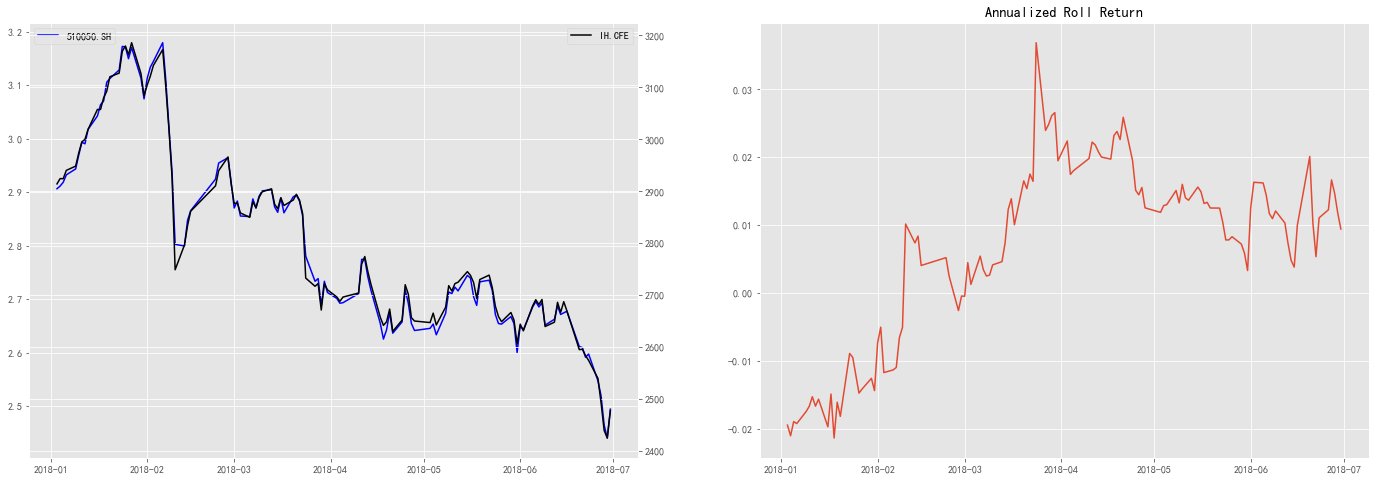

In [33]:
# 样本外策略
# --------参数设置---------
StartDT_OutSample = dt.datetime(2018, 1, 1)
EndDT_OutSample = dt.datetime(2018, 6, 30, 23, 59, 59, 999999)

# --------准备数据--------
WDB.connect()
DTs_OutSample = WDB.getTable("中国封闭式基金日行情").getDateTime(start_dt=StartDT_OutSample, end_dt=EndDT_OutSample)
Price_OutSample = WDB.getTable("中国A股指数日行情").readData(factor_names=["收盘价"], ids=[SpotID], dts=DTs_OutSample).iloc[0, :, :]
Price_OutSample[ETFID] = WDB.getTable("中国封闭式基金日行情").readData(factor_names=["收盘价(元)"], ids=[ETFID], dts=DTs_OutSample).iloc[0,:,0]
Price_OutSample[FutureID] = WDB.getTable("中国股指期货日行情").readData(factor_names=["结算价(元)"], ids=[FutureID], dts=DTs_OutSample).iloc[0,:,0]

# 对 ETF 价格进行复权调整
AdjustFactor_OutSample = WDB.getTable("中国封闭式基金日行情").readData(factor_names=["复权因子"], ids=[ETFID], dts=DTs_OutSample).iloc[0,:,0]
Price_OutSample.iloc[:, 1] = Price_OutSample.iloc[:, 1] / AdjustFactor.iloc[-1] * AdjustFactor_OutSample# 前复权

# 对期货数据进行展期调整
FutureIDMap_OutSample = WDB.getTable("中国期货连续(主力)合约和月合约映射表").readData(factor_names=["映射月合约Wind代码"], ids=[FutureID], dts=DTs_OutSample).iloc[0,:,0]
FuturePrice_OutSample = WDB.getTable("中国股指期货日行情").readData(factor_names=["结算价(元)"], ids=FutureIDMap_OutSample.unique(), dts=DTs_OutSample).iloc[0]
iPreID = FutureIDMap_OutSample.iloc[0]
for i, iDT in enumerate(Price_OutSample.index[1:]):
    iID = FutureIDMap_OutSample.loc[iDT]
    if iID!=iPreID:
        iAdjustFactor = FuturePrice_OutSample[iID].iloc[i] / FuturePrice_OutSample[iPreID].iloc[i]
        Price_OutSample.iloc[i:, 2] /= iAdjustFactor
        iPreID = iID

FutureIDMap_OutSample = WDB.getTable("中国期货连续(主力)合约和月合约映射表").readData(factor_names=["映射月合约Wind代码"], ids=FutureContinuousContractIDs, dts=DTs_OutSample).iloc[0,:,:]
FutureIDs_OutSample = sorted(np.unique(FutureIDMap_OutSample.values.flatten()).tolist())
FuturePrice_OutSample = WDB.getTable("中国股指期货日行情").readData(factor_names=["结算价(元)"], ids=FutureIDs_OutSample, dts=DTs_OutSample).iloc[0]
FutureInfo_OutSample = WDB.getTable("中国期货基本资料").readData(factor_names=["上市日期", "最后交易日期"], ids=FutureIDs_OutSample, dts=[dt.datetime.today()]).iloc[:, 0, :]
WDB.disconnect()

# 估计 Roll Return
RollReturn_OutSample = np.full(Price_OutSample.shape[0], np.nan)
for i, iDT in enumerate(tqdm_notebook(FuturePrice_OutSample.index, desc="日期 loop")):
    iFutureIDs = FutureIDMap_OutSample.iloc[i].values.tolist()
    iX = [dt.datetime.strptime(iDateStr, "%Y%m%d").date() for iDateStr in FutureInfo_OutSample["最后交易日期"].loc[iFutureIDs].values]
    iX = np.array([(iDate-iDT.date()).days for iDate in iX])
    iX = np.r_[0, iX]
    iY = np.log(FuturePrice_OutSample.iloc[i].loc[iFutureIDs].values)
    iY = np.r_[np.log(Price_OutSample.iloc[i, 0]), iY]
    iRegRslt = sm.OLS(iY, sm.add_constant(iX, prepend=False), missing="drop").fit()
    RollReturn_OutSample[i] = -iRegRslt.params[0] * 240
RollReturn_OutSample = pd.Series(RollReturn_OutSample, index=FuturePrice_OutSample.index, name="Annualized Roll Return")

# 绘制价格图像
Fig, Axes = plt.subplots(1, 2, figsize=(24, 8))
Axes[0].xaxis_date()
Axes[0].xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
Axes[0].plot(Price_OutSample.index, Price_OutSample.values[:, 1], color='b', label=Price_OutSample.columns[1])
RAxis = Axes[0].twinx()
RAxis.plot(Price_OutSample.index, Price_OutSample.values[:, 2], color='k', label=Price_OutSample.columns[2])
Axes[0].legend(loc='upper left')
RAxis.legend(loc='upper right');
Axes[1].plot(RollReturn_OutSample)
Axes[1].set_title(RollReturn_OutSample.name);

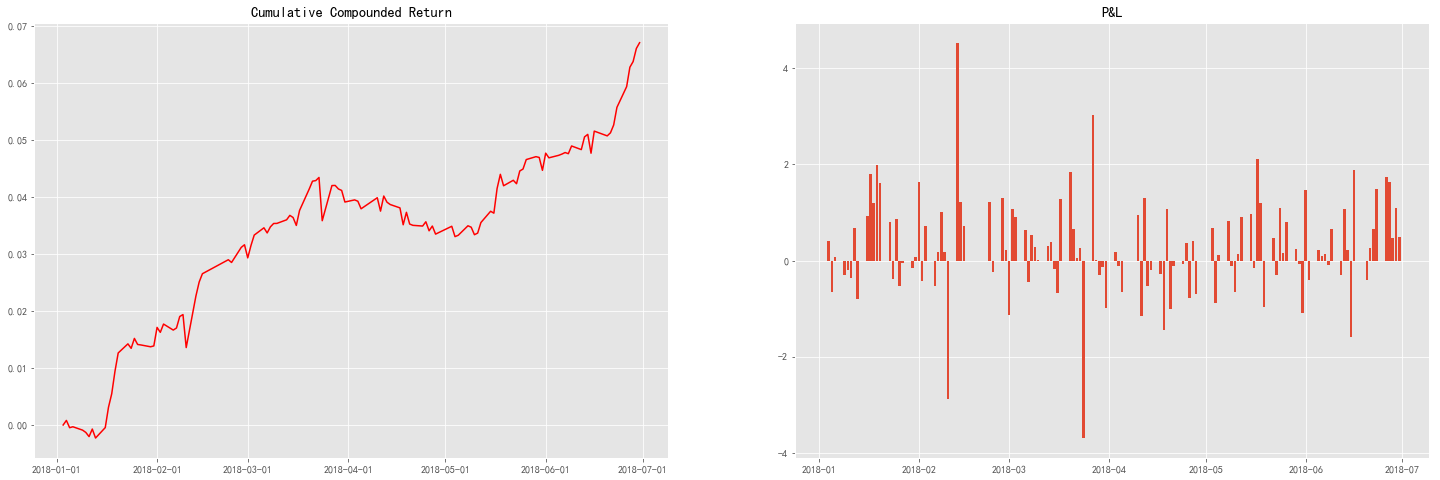

APR: 14.23%, Sharpe Ratio: 4.21


In [37]:
SpreadWoRR_OutSample = pd.Series(np.sum(CointJohansenTest_WRR.evec[:, 0]*np.c_[np.log(Price_OutSample.iloc[:, 1:].values), RollReturn_OutSample.values], axis=1), index=Price_OutSample.index)
Spread_OutSample = np.sum(CointJohansenTest_WRR.evec[:, 0][:2]*np.log(Price_OutSample.iloc[:, 1:].values), axis=1)
Signal_OutSample = np.full(Price_OutSample.shape[0], np.nan)
for i, iDT in enumerate(Price_OutSample.index):
    iModelRslt = sm.tsa.ARMA(np.r_[SpreadWoRR.values[i:], SpreadWoRR_OutSample.values[:i+1]], order=(2, 1)).fit(trend="c", disp=False)
    Signal_OutSample[i] = iModelRslt.forecast(1)[0] - RollReturn_OutSample.values[i] * CointJohansenTest_WRR.evec[:, 0][2] - Spread_OutSample[i]
NumUnitsLong = pd.Series(np.nan, index=SpreadWoRR_OutSample.index)
NumUnitsLong.iloc[0] = 0
NumUnitsLong[Signal_OutSample > 0] = 1
NumUnitsLong[Signal_OutSample <= 0] = 0
NumUnitsLong.fillna(method="pad", inplace=True)
NumUnitsShort = pd.Series(np.nan, index=SpreadWoRR_OutSample.index)
NumUnitsShort.iloc[0] = 0
NumUnitsShort[Signal_OutSample < 0] = -1
NumUnitsShort[Signal_OutSample >= 0] = 0
NumUnitsShort.fillna(method="pad", inplace=True)
NumUnits = NumUnitsLong + NumUnitsShort
Positions = pd.DataFrame(np.repeat(NumUnits.values.reshape((NumUnits.shape[0], 1)), Price_OutSample.shape[1]-1, axis=1) * CointJohansenTest_WRR.evec[:, 0][:2], index=Price_OutSample.index, columns=Price_OutSample.columns[1:])
# Positions = np.repeat(NumUnits.values.reshape((NumUnits.shape[0], 1)), Price.shape[1], axis=1) * CointJohansenTest.evec[:, 0] * Price
PNL = (Positions.shift(1) * (Price_OutSample.iloc[:, 1:] - Price_OutSample.iloc[:, 1:].shift(1)) / Price_OutSample.iloc[:, 1:].shift(1)).sum(axis=1)
Return = PNL / Positions.shift(1).abs().sum(axis=1)
Return[~np.isfinite(Return)] = 0.0
CumReturn = (1+Return).cumprod() - 1

# 展示策略表现
Fig, Axes = plt.subplots(1, 2, figsize=(25, 8))
Axes[0].xaxis_date()
Axes[0].xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
Axes[0].plot(CumReturn.index, CumReturn.values, color='r')
Axes[0].set_title("Cumulative Compounded Return")
Axes[1].bar(PNL.index, PNL.values)
Axes[1].set_title("P&L")
plt.show()

DTs = Return[pd.notnull(Return)].index
nYear = (DTs[-1] - DTs[0]).days/365
print("APR: %.2f%%, Sharpe Ratio: %.2f" % (((1+Return).prod()**(1/nYear)-1) * 100, np.sqrt(len(DTs)/nYear)*Return.mean()/Return.std()))